## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

## Load cleaned datasets

In [2]:
benin_df = pd.read_csv('../data/benin_clean.csv')
sierra_leone_df = pd.read_csv('../data/sierra_leone_clean.csv')
togo_df = pd.read_csv('../data/togo_clean.csv')

In [3]:
# Add country column for identification
benin_df['Country'] = 'Benin'
sierra_leone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine datasets for comparison
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)

## Metric Comparison - Boxplots

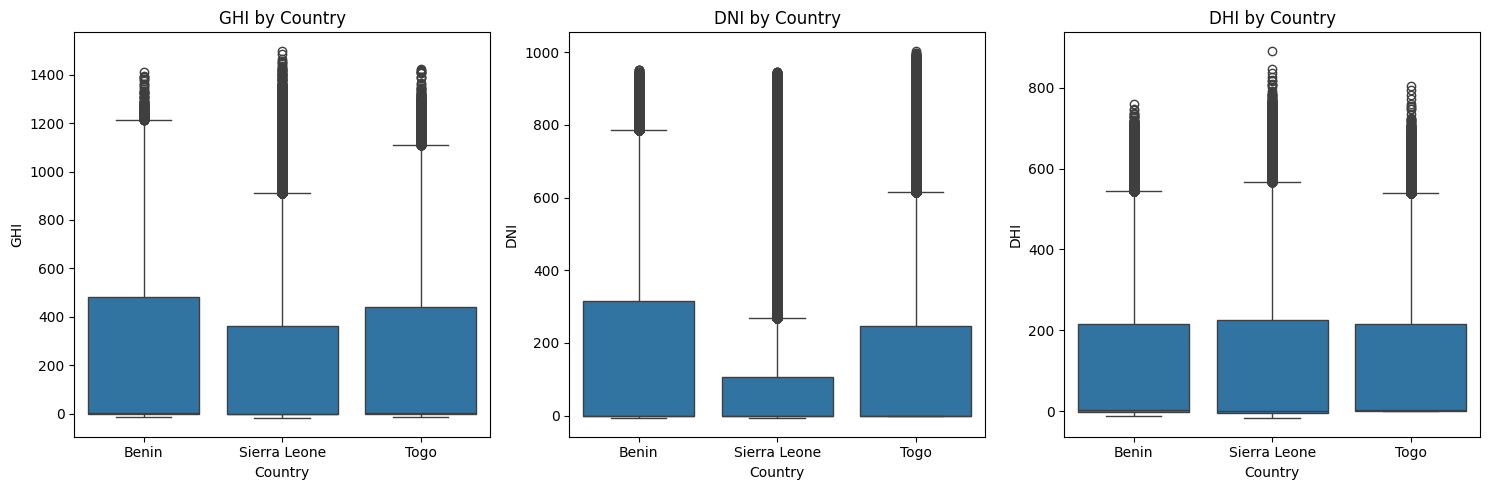

In [4]:
# Boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined_df)
    plt.title(f'{metric} by Country')
    plt.xlabel('Country')
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

## Summary Table

In [5]:
# Summary table for mean, median, and standard deviation
summary_stats = combined_df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
print("Summary Statistics (Mean, Median, Std) for GHI, DNI, DHI by Country:")
display(summary_stats)

Summary Statistics (Mean, Median, Std) for GHI, DNI, DHI by Country:


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

## Statistical Testing

In [6]:
# One-way ANOVA for GHI
try:
    ghi_benin = benin_df['GHI'].dropna()
    ghi_sierra_leone = sierra_leone_df['GHI'].dropna()
    ghi_togo = togo_df['GHI'].dropna()
    f_stat, p_value = f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)
    print(f"One-way ANOVA for GHI: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("Result: Significant differences in GHI between countries (p < 0.05).")
    else:
        print("Result: No significant differences in GHI between countries (p >= 0.05).")
except:
    print("ANOVA failed, trying Kruskal-Wallis test.")
    stat, p_value = kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)
    print(f"Kruskal-Wallis for GHI: Statistic = {stat:.2f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("Result: Significant differences in GHI between countries (p < 0.05).")
    else:
        print("Result: No significant differences in GHI between countries (p >= 0.05).")

One-way ANOVA for GHI: F-statistic = 2090.09, p-value = 0.0000
Result: Significant differences in GHI between countries (p < 0.05).


## Key Observations


- **Benin demonstrates the highest mean GHI** (240.56) and median GHI (1.8), indicating strong solar potential, though its high standard deviation (331.13) suggests significant variability in irradiance, potentially due to weather fluctuations.
- **Sierra Leone shows the lowest mean DNI** (116.38) and a negative median DNI (-0.1), which may indicate data anomalies or consistently low direct normal irradiance, possibly influenced by cloud cover or measurement issues, compared to Benin (167.19 mean) and Togo (151.26 mean).
- **Togo exhibits the most consistent GHI** with a median of 2.1 and a lower standard deviation (322.53) compared to Benin, suggesting more stable solar irradiance, making it a potentially reliable choice for solar energy projects.

## Visual Summary (Bar Chart)

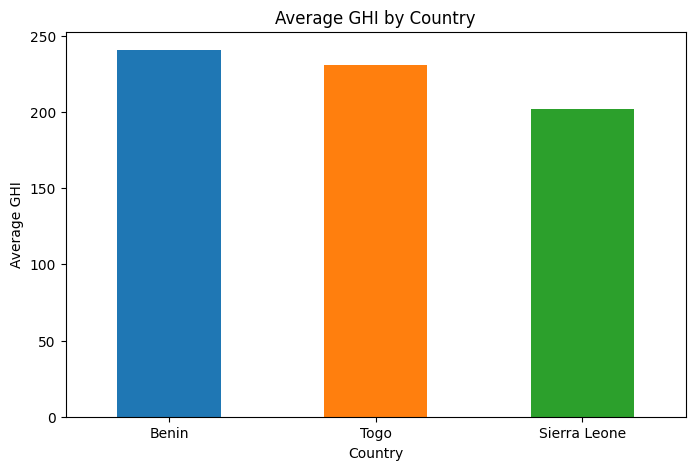

In [7]:
# Bar chart ranking countries by average GHI
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=0)
plt.show()